In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
data=pd.read_csv('crime_data.csv')
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
data.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [4]:
column = ['Murder','Assault','UrbanPop','Rape']

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


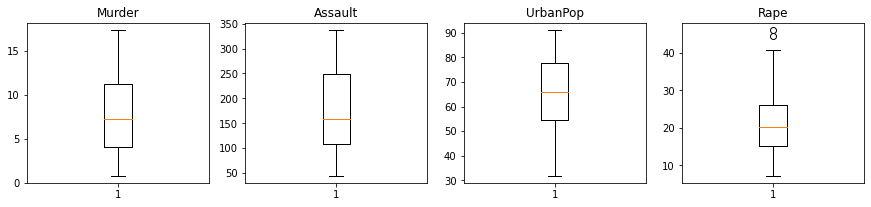

In [6]:
plot = 1
plt.figure(figsize = (15, 10))
for i in column:
    plt.subplot(3,4,plot)
    plt.boxplot(data[i])
    plt.title(i)
    plot = plot+1

C:\Users\Prabhu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Prabhu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Prabhu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

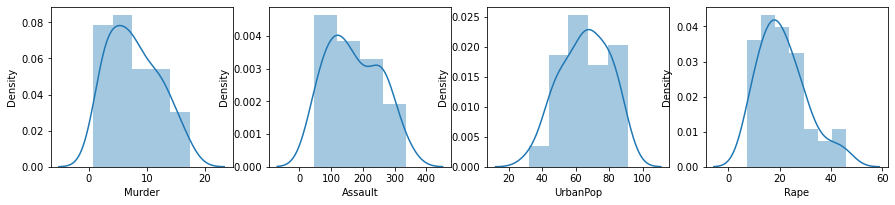

In [7]:
plot = 1
plt.figure(figsize = (15, 10))
for i in column:
    plt.subplot(3,4,plot)
    sns.distplot(data[i])
    plot = plot+1

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

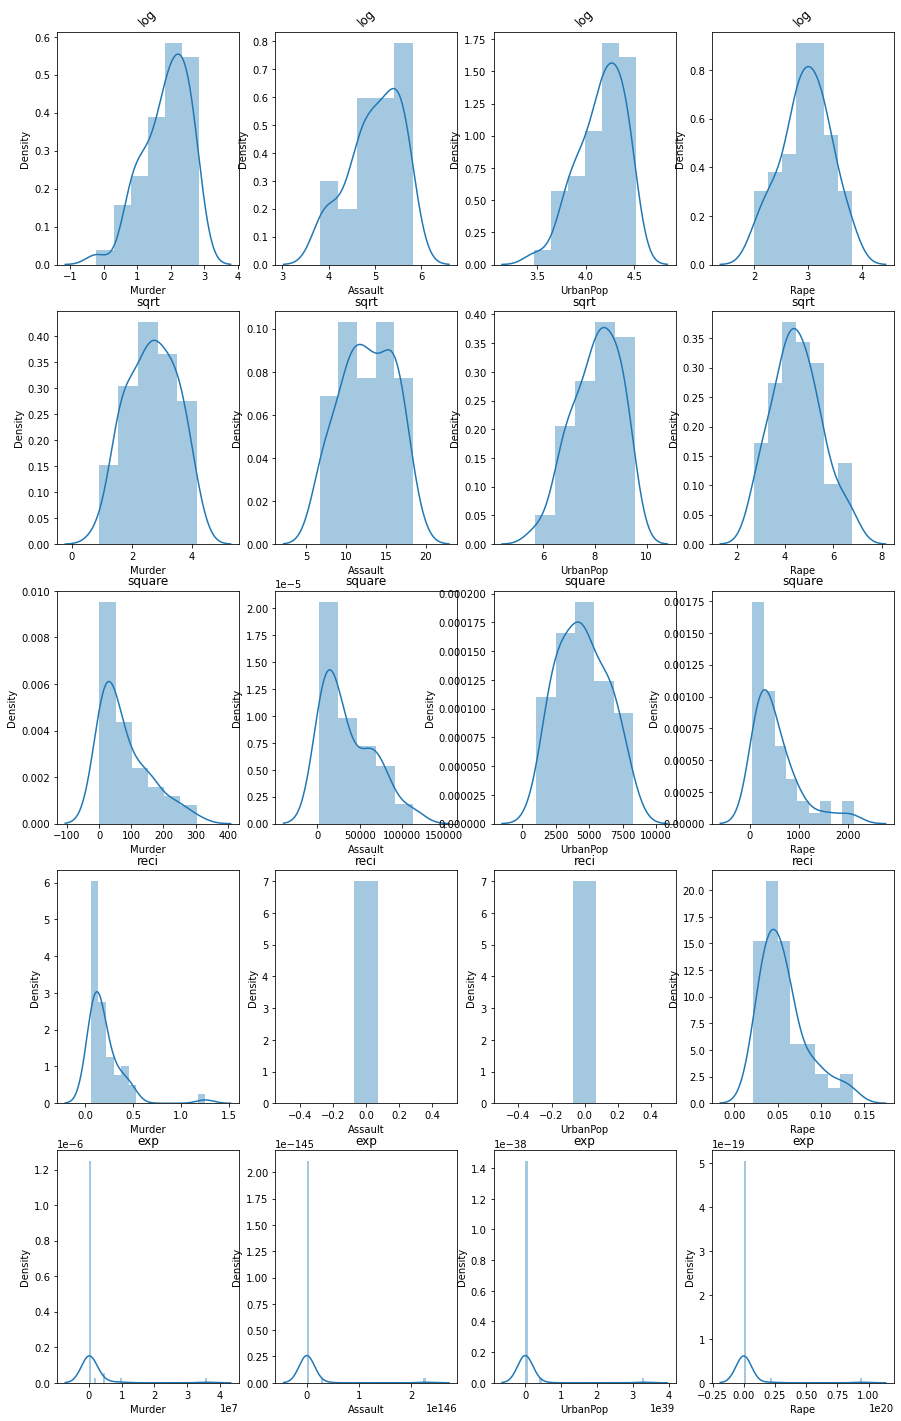

In [13]:
plot = 1
plt.figure(figsize = (15, 30))
for i in column:
    l = np.log(data[i])
    plt.subplot(6,4,plot)
    sns.distplot(l)
    plt.title('log',rotation=45)
    plot = plot+1
for i in column:
    s = np.sqrt(data[i])
    plt.subplot(6,4,plot)
    sns.distplot(s)
    plt.title('sqrt')
    plot = plot+1
for i in column:
    sq = np.square(data[i])
    plt.subplot(6,4,plot)
    sns.distplot(sq)
    plt.title('square')
    plot = plot+1
for i in column:
    r = np.reciprocal(data[i])
    plt.subplot(6,4,plot)
    sns.distplot(r)
    plt.title('reci')
    plot = plot+1
for i in column:
    e = np.exp(data[i])
    plt.subplot(6,4,plot)
    sns.distplot(e)
    plt.title('exp')
    plot = plot+1


In [20]:
Murder_sqrt = np.sqrt(data.Murder)

In [17]:
Assault_sqrt = np.sqrt(data.Assault)
UrbanPop_sqrt = np.sqrt(data.UrbanPop)
Rape_sqrt = np.sqrt(data.Rape)

In [25]:
df = {'Murder_sqrt':Murder_sqrt,'Assault_sqrt':Assault_sqrt,'UrbanPop_sqrt':UrbanPop_sqrt,'Rape_sqrt':Rape_sqrt}

In [26]:
data_tran = pd.concat(df, axis = 1)
data_tran

,Murder_sqrt,Assault_sqrt,UrbanPop_sqrt,Rape_sqrt
0,3.633180,15.362291,7.615773,4.604346
1,3.162278,16.217275,6.928203,6.670832
2,2.846050,17.146428,8.944272,5.567764
3,2.966479,13.784049,7.071068,4.415880
4,3.000000,16.613248,9.539392,6.371813
5,2.810694,14.282857,8.831761,6.220932
6,1.816590,10.488088,8.774964,3.331666
7,2.428992,15.427249,8.485281,3.974921
8,3.924283,18.303005,8.944272,5.648008
9,4.171331,14.525839,7.745967,5.079370


# hierarchical

In [27]:
#normalization
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [32]:
dt_norm = norm_func(data_tran)
dt_norm

,Murder_sqrt,Assault_sqrt,UrbanPop_sqrt,Rape_sqrt
0,0.835775,0.742881,0.504546,0.466243
1,0.692071,0.816274,0.327453,0.972675
2,0.595569,0.896034,0.846719,0.702347
3,0.632320,0.607402,0.364250,0.420056
4,0.642550,0.850265,1.000000,0.899395
5,0.584780,0.650221,0.817740,0.862419
6,0.281413,0.324472,0.803111,0.154348
7,0.468297,0.748457,0.728500,0.311990
8,0.924610,0.995317,0.846719,0.722013
9,1.000000,0.671079,0.538079,0.582657


In [33]:
dt_norm.describe()

,Murder_sqrt,Assault_sqrt,UrbanPop_sqrt,Rape_sqrt
count,50.000000,50.000000,50.000000,50.000000
mean,0.542239,0.509705,0.614898,0.440732
std,0.248950,0.285499,0.237114,0.245041
min,0.000000,0.000000,0.000000,0.000000
25%,0.343002,0.320370,0.444381,0.289331
50%,0.548731,0.506579,0.635457,0.436576
75%,0.750602,0.778715,0.814083,0.591670
max,1.000000,1.000000,1.000000,1.000000


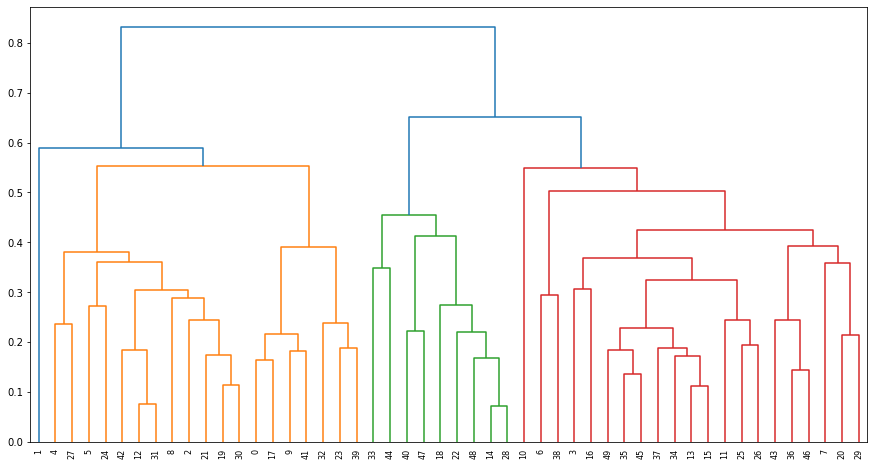

In [34]:
plt.figure(figsize=(15, 8)) 
dendrogram = sch.dendrogram(sch.linkage(dt_norm, method='average'))

In [35]:
model = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'average')
preds = model.fit_predict(dt_norm)
Clusters=pd.DataFrame(preds,columns=['Clusters'])
Clusters.value_counts()

Clusters
1           21
0           20
2            9
dtype: int64

In [36]:
data['Clusters'] = Clusters
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


In [37]:
data.groupby('Clusters').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
Clusters,,,,
0,12.165000,255.250000,68.400000,29.165000
1,5.804762,135.809524,69.190476,18.257143
2,2.688889,64.555556,50.666667,10.544444


# K-Means

In [40]:
scaler = StandardScaler()
dt_std = scaler.fit_transform(data_tran)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


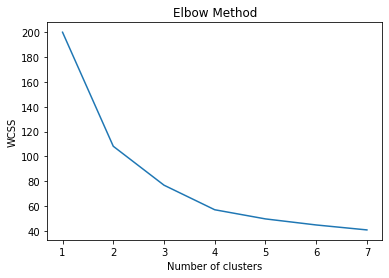

In [43]:
wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(dt_std)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 8), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [44]:
model_km = KMeans(3, random_state=42)
preds_km = model_km.fit_predict(dt_std)
clusters_km = pd.DataFrame(preds_km, columns = ['clusters_km'])
clusters_km.value_counts()

clusters_km
1              20
2              20
0              10
dtype: int64

In [45]:
data['clusters_km'] = clusters_km
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clusters,clusters_km
0,Alabama,13.2,236,58,21.2,0,2
1,Alaska,10.0,263,48,44.5,0,2
2,Arizona,8.1,294,80,31.0,0,2
3,Arkansas,8.8,190,50,19.5,1,1
4,California,9.0,276,91,40.6,0,2
5,Colorado,7.9,204,78,38.7,0,2
6,Connecticut,3.3,110,77,11.1,1,1
7,Delaware,5.9,238,72,15.8,1,1
8,Florida,15.4,335,80,31.9,0,2
9,Georgia,17.4,211,60,25.8,0,2


In [46]:
data.groupby('clusters_km').agg(['mean'])

,Murder,Assault,UrbanPop,Rape,Clusters
,mean,mean,mean,mean,mean
clusters_km,,,,,
0,2.680,70.10,51.00,10.910,1.9
1,5.965,136.60,69.95,18.460,1.0
2,12.165,255.25,68.40,29.165,0.0


# DBSCAN

In [47]:
model_db = DBSCAN(eps=1.6, min_samples=7)
preds_dbscan = model_db.fit_predict(dt_std)
silhouette_score(dt_std, preds_dbscan)

0.1766609519189161

In [48]:
data['clusters_dbscan'] = preds_dbscan
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clusters,clusters_km,clusters_dbscan
0,Alabama,13.2,236,58,21.2,0,2,0
1,Alaska,10.0,263,48,44.5,0,2,-1
2,Arizona,8.1,294,80,31.0,0,2,0
3,Arkansas,8.8,190,50,19.5,1,1,0
4,California,9.0,276,91,40.6,0,2,0
5,Colorado,7.9,204,78,38.7,0,2,0
6,Connecticut,3.3,110,77,11.1,1,1,0
7,Delaware,5.9,238,72,15.8,1,1,0
8,Florida,15.4,335,80,31.9,0,2,0
9,Georgia,17.4,211,60,25.8,0,2,0


In [49]:
data.clusters_dbscan.value_counts()

 0    49
-1     1
Name: clusters_dbscan, dtype: int64

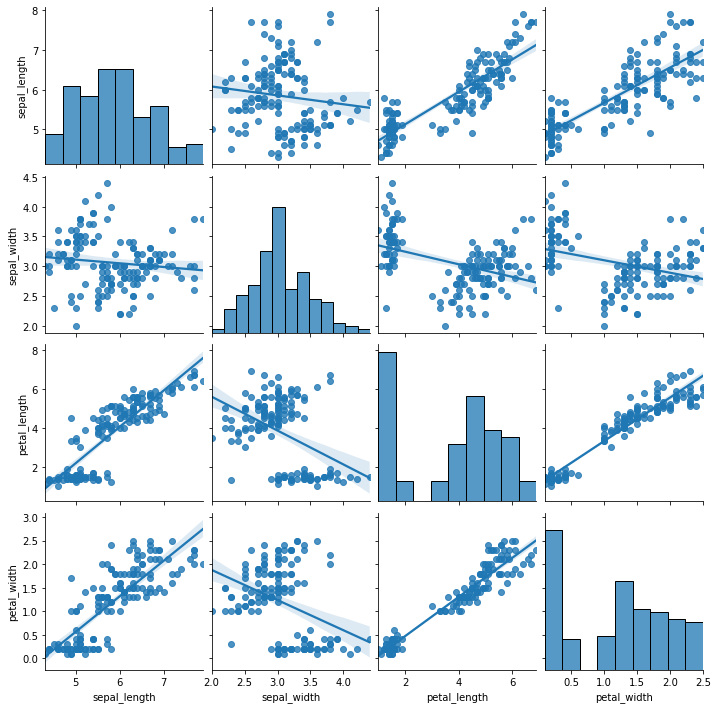

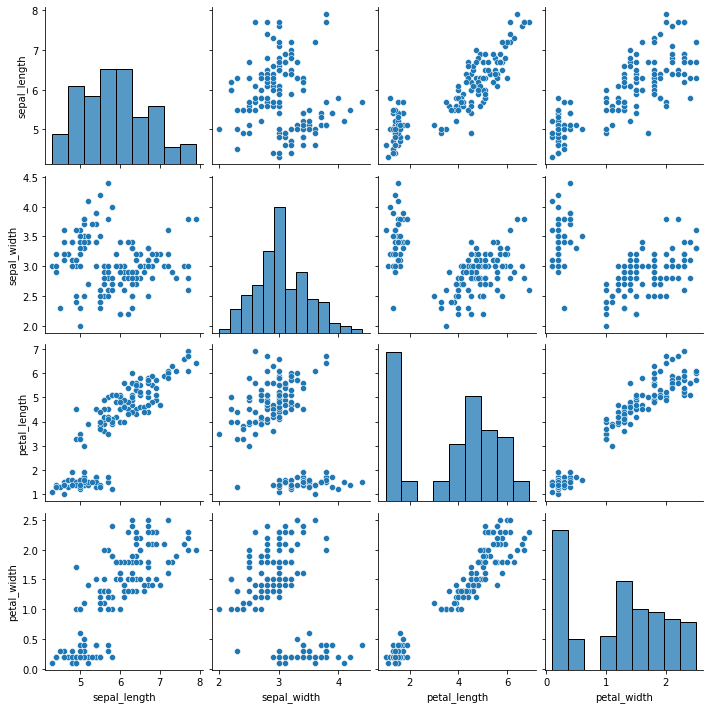

In [16]:
# library & dataset
import matplotlib.pyplot as plt
import seaborn as sns
df = sns.load_dataset('iris')
 
# with regression
sns.pairplot(df, kind="reg")
plt.show()
 
# without regression
sns.pairplot(df, kind="scatter")
plt.show()

In [50]:
data.groupby('clusters_dbscan').agg(['mean'])

,Murder,Assault,UrbanPop,Rape,Clusters,clusters_km
,mean,mean,mean,mean,mean,mean
clusters_dbscan,,,,,,
-1,10.000000,263.000000,48.000000,44.500000,0.000000,2.000000
0,7.742857,168.877551,65.897959,20.757143,0.795918,1.183673


firstly i am loaded the data and doing EDA phase and  Then by moving to EDA the names of the columns and familiar with python, after that in this data there is no null values and no duplicates. then check with an outliers and i got two outliers in 'rape' and i  removed that outliers. And no dimension is following normal distribution.then doing a transformation and by applying  sqrt and square i observed that, the data is following normal distribution(approximately)And i am creating a new dataframe and  name them. For performing the clustering techniques the data should be in normalized or standardized the reason is, for dividing the data in clusters we have to find the distance and plot the dendrograms. Finding the distance and ploting the dendrograms the data points shoulds be near to each other. If the data points are not near finding the distance is difficultly. So, done the normalization which is in 0's and 1's and standardization which have mean=0 and standard deviation=1.
Hierarchical
In hierarchical started with ploting a dendrogram with linkage method is average. and then build a model with AgglomerativeClustering by giving n-clusters=3 , euclidean distance and linkage is average. And fitted with the data on model. Then the data is divided in three clusters. Finally the mean value of the ever cluster is not near.
K-Means
In K-Means  plotted a k-plot for finding a no. of clusters to create and observed three cluster is better. Then  build a model with Kmeans by giving no. of clusters=3 and random state. And  fitted with the data on model. Then the data is divided into three clusters. Amd the mean of the clusters in not near.

DBSCAN
  In DBSCAN build a model with dbscan by giving epslion=1.6 and min-samples=7. And fitted the data on model. Then the data is divided into two clusters. And the mean of the clusters is not near.